This notebook was used to get a better understanding of the area and to help plot folium maps found in another note book.

In [4]:
import geopandas as gpd
import folium
%matplotlib inline
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
path="../../"
import seaborn as sns
data_path="../../"

Below is the shape file located on the [Chicago Data portal](https://data.cityofchicago.org/browse?tags=shapefiles)

In [2]:
chicago=gpd.read_file(path+"data/Boundaries - ZIP Codes/geo_export_0b00a2dc-78e8-45e4-a3d1-f7ac26b15418.shp")
chicago

,objectid,shape_area,shape_len,zip,geometry
0,33.0,1.060523e+08,42720.044406,60647,"POLYGON ((-87.67762 41.91776, -87.67761 41.917..."
1,34.0,1.274761e+08,48103.782721,60639,"POLYGON ((-87.72683 41.92265, -87.72693 41.922..."
2,35.0,4.506904e+07,27288.609612,60707,"POLYGON ((-87.78500 41.90915, -87.78531 41.909..."
3,36.0,7.085383e+07,42527.989679,60622,"POLYGON ((-87.66707 41.88885, -87.66707 41.888..."
4,37.0,9.903962e+07,47970.140153,60651,"POLYGON ((-87.70656 41.89555, -87.70672 41.895..."
...,...,...,...,...,...
56,57.0,1.552855e+08,53406.915617,60623,"POLYGON ((-87.69479 41.83008, -87.69486 41.830..."
57,58.0,2.111148e+08,58701.325375,60629,"POLYGON ((-87.68306 41.75786, -87.68306 41.757..."
58,59.0,2.116961e+08,58466.160298,60620,"POLYGON ((-87.62373 41.72167, -87.62388 41.721..."
59,60.0,1.254243e+08,52377.854541,60637,"POLYGON ((-87.57691 41.79511, -87.57700 41.795..."


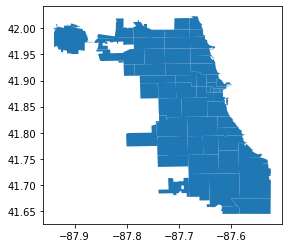

In [10]:
chicago.plot()

Now we import the Zillow housing data to locate our desired zipcodes.

In [5]:
df=pd.read_csv(data_path+"data/zillow_data.csv")
df

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,337600.0,338500.0,339500.0,340400.0,341300.0,342600.0,344400.0,345700.0,346700.0,347800.0,349000.0,350400.0,352000.0,353900.0,356200.0,358800.0,361800.0,365700.0,370200.0,374700.0,378900.0,383500.0,388300.0,393300.0,398500.0,403800.0,409100.0,414600.0,420100.0,426200.0,432600.0,438600.0,444200.0,450000.0,455900.0,462100.0,468500.0,475300.0,482500.0,490200.0,498200.0,507200.0,516800.0,526300.0,535300.0,544500.0,553500.0,562400.0,571200.0,579800.0,588100.0,596300.0,604200.0,612200.0,620200.0,627700.0,634500.0,641000.0,647000.0,652700.0,658100.0,663300.0,668400.0,673400.0,678300.0,683200.0,688300.0,693300.0,698000.0,702400.0,706400.0,710200.0,714000.0,717800.0,721700.0,725700.0,729900.0,733400.0,735600.0,737200.0,739000.0,740900.0,742700.0,744400.0,746000.0,747200.0,748000.0,749000.0,750200.0,752300.0,755300.0,759200.0,764000.0,769600.0,775600.0,781900.0,787900.0,793200.0,798200.0,803100.0,807900.0,812900.0,818100.0,823100.0,828300.0,834100.0,839800.0,845600.0,851800.0,858000.0,864400.0,870700.0,876200.0,880700.0,884400.0,887600.0,890500.0,893300.0,895500.0,897300.0,899000.0,900400.0,902000.0,904400.0,907100.0,909700.0,911900.0,913000.0,913000.0,912000.0,909300.0,905300.0,901400.0,897900.0,895400.0,893600.0,891100.0,887000.0,881700.0,875900.0,870300.0,865100.0,859000.0,851500.0,843800.0,836400.0,830700.0,827300.0,824800.0,821600.0,818300.0,814600.0,809800.0,803600.0,795500.0,786900.0,780700.0,776900.0,774700.0,774200.0,774400.0,774600.0,775600.0,777800.0,775200.0,767900.0,764700.0,766100.0,764100.0,759700.0,754900.0,746200.0,737300.0,730800.0,729300.0,730200.0,730700.0,730000.0,730100.0,730100.0,731200.0,733900.0,735500.0,735400.0,734400.0,737500.0,737700.0,733700.0,734000.0,740300.0,744600.0,750500.0,760400.0,771800.0,780600.0,

Filter by the Chicago metro area

In [7]:
chicago_df=df[df['Metro'] == 'Chicago']
chicago_df

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,337600.0,338500.0,339500.0,340400.0,341300.0,342600.0,344400.0,345700.0,346700.0,347800.0,349000.0,350400.0,352000.0,353900.0,356200.0,358800.0,361800.0,365700.0,370200.0,374700.0,378900.0,383500.0,388300.0,393300.0,398500.0,403800.0,409100.0,414600.0,420100.0,426200.0,432600.0,438600.0,444200.0,450000.0,455900.0,462100.0,468500.0,475300.0,482500.0,490200.0,498200.0,507200.0,516800.0,526300.0,535300.0,544500.0,553500.0,562400.0,571200.0,579800.0,588100.0,596300.0,604200.0,612200.0,620200.0,627700.0,634500.0,641000.0,647000.0,652700.0,658100.0,663300.0,668400.0,673400.0,678300.0,683200.0,688300.0,693300.0,698000.0,702400.0,706400.0,710200.0,714000.0,717800.0,721700.0,725700.0,729900.0,733400.0,735600.0,737200.0,739000.0,740900.0,742700.0,744400.0,746000.0,747200.0,748000.0,749000.0,750200.0,752300.0,755300.0,759200.0,764000.0,769600.0,775600.0,781900.0,787900.0,793200.0,798200.0,803100.0,807900.0,812900.0,818100.0,823100.0,828300.0,834100.0,839800.0,845600.0,851800.0,858000.0,864400.0,870700.0,876200.0,880700.0,884400.0,887600.0,890500.0,893300.0,895500.0,897300.0,899000.0,900400.0,902000.0,904400.0,907100.0,909700.0,911900.0,913000.0,913000.0,912000.0,909300.0,905300.0,901400.0,897900.0,895400.0,893600.0,891100.0,887000.0,881700.0,875900.0,870300.0,865100.0,859000.0,851500.0,843800.0,836400.0,830700.0,827300.0,824800.0,821600.0,818300.0,814600.0,809800.0,803600.0,795500.0,786900.0,780700.0,776900.0,774700.0,774200.0,774400.0,774600.0,775600.0,777800.0,775200.0,767900.0,764700.0,766100.0,764100.0,759700.0,754900.0,746200.0,737300.0,730800.0,729300.0,730200.0,730700.0,730000.0,730100.0,730100.0,731200.0,733900.0,735500.0,735400.0,734400.0,737500.0,737700.0,733700.0,734000.0,740300.0,744600.0,750500.0,760400.0,771800.0,780600.0,

Now we add our 5 year and 2 year Roi's to aid in filtering Chicago data

In [9]:
chicago_df['ROI_5yrs']=((chicago_df['2018-04'] -chicago_df['2013-04'])/chicago_df['2013-04'])*100
chicago_df['ROI_2yrs'] = ((chicago_df['2018-04'] - chicago_df['2016-04'])/chicago_df['2016-04'])*100

<ipython-input-9-e4f33d0a7498>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chicago_df['ROI_5yrs']=((chicago_df['2018-04'] -chicago_df['2013-04'])/chicago_df['2013-04'])*100
<ipython-input-9-e4f33d0a7498>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chicago_df['ROI_2yrs'] = ((chicago_df['2018-04'] - chicago_df['2016-04'])/chicago_df['2016-04'])*100


We now filter by the 2 year and 5 year rois for our top values,

In [11]:
plot_Df=chicago_df.sort_values('ROI_5yrs', ascending=False)[:100].sort_values('ROI_2yrs', ascending=False)
plot_Df

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,ROI_5yrs,ROI_2yrs
383,84340,60085,Waukegan,IL,Chicago,Lake,384,96100.0,96700.0,97100.0,97300.0,97200.0,96900.0,96400.0,95700.0,95100.0,94600.0,93800.0,92700.0,91700.0,90800.0,90000.0,89300.0,88700.0,88400.0,88300.0,88400.0,88900.0,89800.0,90800.0,91800.0,93200.0,94700.0,96400.0,98200.0,100100.0,101900.0,103500.0,104800.0,106000.0,107000.0,107400.0,107500.0,107400.0,107200.0,107100.0,107000.0,107100.0,107500.0,108100.0,108800.0,109800.0,111100.0,112300.0,113300.0,114500.0,115600.0,116600.0,117700.0,118600.0,119500.0,120400.0,121100.0,121800.0,122400.0,122800.0,123100.0,123300.0,123500.0,123700.0,124000.0,124400.0,124800.0,125300.0,126000.0,126800.0,127500.0,128300.0,129100.0,129800.0,130500.0,131100.0,131700.0,132200.0,132600.0,133000.0,133400.0,133700.0,134100.0,134400.0,134800.0,135100.0,135500.0,135900.0,136300.0,136700.0,137200.0,137600.0,138100.0,138500.0,139000.0,139300.0,139700.0,140200.0,140700.0,141300.0,141900.0,142500.0,143000.0,143600.0,144200.0,144900.0,145800.0,146600.0,147400.0,148300.0,149000.0,149700.0,150500.0,151200.0,152000.0,152700.0,153500.0,154500.0,155300.0,155800.0,156100.0,156300.0,156300.0,156600.0,157200.0,157800.0,158200.0,158400.0,158700.0,159100.0,159200.0,159300.0,159000.0,158400.0,157500.0,156800.0,156200.0,155200.0,153100.0,150900.0,149300.0,148400.0,147200.0,145800.0,144300.0,142400.0,140400.0,138600.0,136800.0,134100.0,130200.0,126300.0,123800.0,122000.0,119800.0,117600.0,115400.0,112400.0,109100.0,105900.0,103100.0,100200.0,96400.0,92400.0,90200.0,87900.0,86300.0,86900.0,88100.0,88500.0,91200.0,92600.0,92200.0,91400.0,91000.0,89900.0,89600.0,86800.0,82300.0,77500.0,77200.0,79200.0,77500.0,72900.0,69900.0,69600.0,72300.0,76400.0,76300.0,75000.0,76300.0,77700.0,74200.0,69900.0,68900.0,69900.0,68600.0,66000.0,66100.0,66900.0,65200.0,65400.0,67100.0,66600.0,64

In [12]:
plot_zip= plot_Df.set_index('RegionName', inplace=True)

In [37]:
plot_zip

In [38]:
plot_Df=plot_Df.T

We now have flipped our data frame so our Columns are our zips codes so now they are easily callable with their median home values over time.

In [39]:
plot_Df

RegionName,60085,60436,60163,60034,60180,60633,46324,60099,46394,60505,60162,53181,60165,60639,60160,60409,46323,60520,60073,47977,60110,60153,60804,60403,53140,60447,60155,60164,53168,53104,53170,60435,60411,60139,60178,60104,60185,60097,60120,60090,60410,53158,53179,53143,60123,60133,60440,60506,60131,60014,60625,60544,60107,60641,60501,60629,60653,60106,60151,60538,60638,60156,60130,60654,60042,60402,60514,60651,60041,60555,60642,60060,60181,60607,60647,60171,60101,60053,60613,60446,60630,60191,60169,60634,60612,60622,60618,60659,60526,60154,60077,60076,60632,60707,60513,60545,60608,60640,60534,60061
RegionID,84340,84487,84412,84298,84426,84634,78095,84354,78133,84541,84411,81267,84414,84639,84409,84464,78094,84554,84329,78876,84364,84403,84693,399605,81240,84498,84405,84413,81259,81218,81260,84486,84466,84390,84424,84358,84430,84352,84373,84345,84465,81256,81266,81243,84376,84384,84491,84542,84382,84283,84627,84573,84361,84641,84537,84630,84650,84360,84401,84567,84638,84406,84381,84651,84305,84460,84548,84648,84304,84583,399713,84318,84427,84609,84646,84417,84355,84315,84615,84497,84631,84436,399603,84635,84614,84624,84620,84655,84559,84404,84333,84332,84633,84689,84547,84574,84610,84640,84564,84319
City,Waukegan,Joliet,Berkeley,Hebron,Union,Chicago,Hammond,Zion,Whiting,Aurora,Hillside,Twin Lakes,Stone Park,Chicago,Melrose Park,Calumet City,Hammond,Hinckley,Round Lake Beach,Remington,Carpentersville,Maywood,Cicero,Crest Hill,Kenosha,Minooka,Broadview,Northlake,Salem,Bristol,Salem,Joliet,Chicago Heights,Glendale Heights,Sycamore,Bellwood,West Chicago,Wonder Lake,Elgin,Wheeling,Channahon,Pleasant Prairie,Salem,Kenosha,Elgin,Hanover Park,Bolingbrook,Aurora,Franklin Park,Crystal Lake,Chicago,Plainfield,Streamwood,Chicago,Summit,Chicago,Chicago,Bensenville,Maple Park,Montgomery,Chicago,Lake in the Hills,Forest Park,Chicago,Island Lake,Berwyn,Clarendon Hills,Chicago,Long Lake,Warrenville,Chicago,Mundelein,Villa Park,Chicago,Chicago,River Grove,Addison,Morton Grove,Chicago,Romeoville,Chicago,Wood Dale,Hoffman Estates,Chicago,Chicago,Chicago,Chicago,Chicago,La Grange Park,Westchester,Skokie,Skokie,Chicago,Elmwood Park,Brookfield,Plano,Chicago,Chicago,Lyons,Vernon Hills
State,IL,IL,IL,IL,IL,IL,IN,IL,IN,IL,IL,WI,IL,IL,IL,IL,IN,IL,IL,IN,IL,IL,IL,IL,WI,IL,IL,IL,WI,WI,WI,IL,IL,IL,IL,IL,IL,IL,IL,IL,IL,WI,WI,WI,IL,IL,IL,IL,IL,IL,IL,IL,IL,IL,IL,IL,IL,IL,IL,IL,IL,IL,IL,IL,IL,IL,IL,IL,IL,IL,IL,IL,IL,IL,IL,IL,IL,IL,IL,IL,IL,IL,IL,IL,IL,IL,IL,IL,IL,IL,IL,IL,IL,IL,IL,IL,IL,IL,IL,IL
Metro,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago
CountyName,Lake,Will,Cook,McHenry,McHenry,Cook,Lake,Lake,Lake,Kane,Cook,Kenosha,Cook,Cook,Cook,Cook,Lake,DeKalb,Lake,Jasper,Kane,Cook,Cook,Will,Kenosha,Grundy,Cook,Cook,Kenosha,Kenosha,Kenosha,Will,Cook,Du Page,DeKalb,Cook,Du Page,McHenry,Kane,Cook,Will,Kenosha,Kenosha,Kenosha,Kane,Cook,Will,Kane,Cook,McHenry,Cook,Will,Cook,Cook,Cook,Cook,Cook,Du Page,Kane,Kendall,Cook,McHenry,Cook,Cook,McHenry,Cook,Du Page,Cook,Lake,Du Page,Cook,Lake,Du Page,Cook,Cook,Cook,Du Page,Cook,Cook,Will,Cook,Du Page,Cook,Cook,Cook,Cook,Cook,Cook,Cook,Cook,Cook,Cook,Cook,Cook,Cook,Kendall,Cook,Cook,Cook,Lake
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [15]:
clean_zip_Df= plot_Df.drop(['RegionID', 'City',"State","Metro","CountyName","SizeRank","ROI_5yrs"])

Cleaned up the Data frame  a little more

In [19]:
clean_zip_Df

RegionName,60633,60639,60619,60625,60641,60605,60629,60653,60638,60654,60651,60642,60607,60647,60611,60613,60630,60634,60646,60612,60622,60618,60659,60649,60632,60620,60656,60631,60608,60610,60640,60652,60616,60657,60645,60614,60655,60615,60643,60626,60660
1996-04,77900,111200,76400,148900,135700,293500,93400,116900,127400,510000,74700,224100,215600,122700,NaN,297900,150600,146800,197300,100900,217000,142600,165400,77400,99600,71900,166300,180900,89800,435200,216500,103700,160600,334200,164900,498100,125700,195300,86400,150900,166000
1996-05,78200,111900,77000,149300,136200,293000,94100,115700,128300,510200,75100,223300,215100,122800,NaN,300400,151600,147700,198900,101400,216900,143100,165300,77600,100100,72500,166900,182200,89800,435200,216700,104400,160400,335400,165400,500900,126300,196600,87200,150100,165600
1996-06,78300,112300,77400,149600,136400,292500,94600,114500,129000,510100,75400,222400,214500,122800,NaN,302600,152300,148300,200100,101900,216900,143400,165000,77600,100400,73000,167200,183100,89800,435100,216900,104700,160100,336500,165700,503100,126600,197800,87600,149300,165200
1996-07,78500,112500,77700,149700,136300,291700,94800,113300,129100,509600,75600,221500,213900,122700,NaN,304700,152600,148500,200800,102300,216800,143300,164600,77600,100400,73300,167100,183500,89700,434600,217000,104700,159800,337600,165600,504600,126500,198900,87800,148400,164800
1996-08,78500,112500,77700,149700,135800,290900,94700,112300,128900,508800,75600,220500,213200,122400,NaN,306600,152400,148400,201000,102700,216800,142900,164100,77500,100300,73400,166900,183400,89500,433900,217100,104400,159500,338500,165400,505500,126100,199900,87700,147600,164400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01,111500,228700,127100,464100,288300,718900,163500,334800,210200,1452900,145200,601500,579500,474500,1497300,1051300,302500,260500,395700,353400,819300,457400,365500,154100,164700,127700,299300,353900,231100,1050800,778500,174700,350100,1024400,360600,1302700,231100,450100,145100,393100,521500
2018-02,112800,231400,126800,464200,289800,715000,164000,335500,212000,1464600,148300,605800,579700,475100,1508600,1059300,304900,262400,398400,352300,819700,459000,368300,151100,165200,128000,300800,356400,233700,1050400,780500,174700,351500,1030700,361400,1306400,232400,453000,145300,390800,524100
2018-03,113300,232700,128000,463200,291000,712500,164000,334400,213500,1472400,150300,606700,579200,472600,1508100,1060200,307600,265100,400600,349000,815400,462500,370800,143700,166100,129000,303000,356900,235700,1045000,782800,174300,354100,1033800,361600,1308500,233000,455700,145500,389400,526300
2018-04,113000,232600,129600,461100,291500,709500,163800,333000,214000,1474500,150900,604400,577600,470200,1493200,1055300,308700,267600,401300,345400,811100,464300,371400,136800,166700,130300,304000,356200,236000,1039700,782800,173500,355500,1030600,360400,1307000,232600,456200,144500,385900,526300


In [16]:
list_of_41=clean_zip_Df.columns

In [17]:
list_of_41=list(list_of_41)

Now we have list of our zips codes to plot easily.

In [16]:
len(list_of_41)

41

In [17]:
list_of_41

[60633,
 60639,
 60619,
 60625,
 60641,
 60605,
 60629,
 60653,
 60638,
 60654,
 60651,
 60642,
 60607,
 60647,
 60611,
 60613,
 60630,
 60634,
 60646,
 60612,
 60622,
 60618,
 60659,
 60649,
 60632,
 60620,
 60656,
 60631,
 60608,
 60610,
 60640,
 60652,
 60616,
 60657,
 60645,
 60614,
 60655,
 60615,
 60643,
 60626,
 60660]

Our column is an object type so we need to convert our list to a str/object type as well to do a match on the other data frame

In [18]:
list_of_41=list(map(str, list_of_41))# => [1,2,3]



List of the final zips codes for our presentaion Geopandas was visual was aborted due to lack of shape files and foliums was utilized.

In [18]:
Final_zipcodes=list(map(str, [60804,
 60085,
 60153,
 60110,
 60104,
 60505,
 60651,
 60073,
 60436,
 60639,
 60120,
 60165,
 60160,
 60641,
 60042,
 60432,
 60163,
 60456,
 60034,
 46327,
 60180,
 60633,
 46324,
 60099,
 46320,
 46394,
 60162]))# => [1,2,3]



In [20]:
len(list_of_new_zips)

27

Now we load in a csv to allow for all the zips codes within illinois

In [25]:
all_us_zips=pd.read_csv(path+"data/zips.csv")
all_us_zips

,zip code,"""state abbreviation""","""latitude""","""longitude""","""city""","""state"""
0,35004,"""AL""",""" 33.606379""",""" -86.50249""","""Moody""","""Alabama"""
1,35005,"""AL""",""" 33.592585""",""" -86.95969""","""Adamsville""","""Alabama"""
2,35006,"""AL""",""" 33.451714""",""" -87.23957""","""Adger""","""Alabama"""
3,35007,"""AL""",""" 33.232422""",""" -86.80871""","""Alabaster""","""Alabama"""
4,35010,"""AL""",""" 32.903432""",""" -85.92669""","""Alexander City""","""Alabama"""
...,...,...,...,...,...,...
33173,00982,"""PR""",""" 18.409345""",""" -65.99313""","""Carolina""","""Puerto Rico"""
33174,00983,"""PR""",""" 18.414408""",""" -65.97582""","""Carolina""","""Puerto Rico"""
33175,00985,"""PR""",""" 18.374896""",""" -65.94691""","""Carolina""","""Puerto Rico"""
33176,00987,"""PR""",""" 18.372228""",""" -65.96275""","""Carolina""","""Puerto Rico"""


Columns have quotes and are diffcult to call so lets take away this problem

In [27]:
all_us_zips.columns=['zip_code', 'state_abbreviation', 'latitude', 'longitude',
       'city', 'state']

In [28]:
new_df=all_us_zips[chicago_zips.zip_code.isin(Final_zipcodes)]

In [29]:
lat=new_df["latitude"].values

In [30]:
long=new_df["longitude"].values

In [31]:
lat_long=zip(lat,long)

Now we have all of the desired zip codes for the folium map

In [32]:
list(lat_long)

[(' " 42.468318"', ' " -88.43125"'),
 (' " 42.277691"', ' " -88.20074"'),
 (' " 42.366253"', ' " -88.09647"'),
 (' " 42.361271"', ' " -87.86187"'),
 (' " 42.451371"', ' " -87.84862"'),
 (' " 41.882924"', ' " -87.87642"'),
 (' " 42.121188"', ' " -88.27227"'),
 (' " 42.037176"', ' " -88.25922"'),
 (' " 41.880281"', ' " -87.84455"'),
 (' " 41.899880"', ' " -87.85978"'),
 (' " 41.872997"', ' " -87.90101"'),
 (' " 41.886794"', ' " -87.91052"'),
 (' " 41.901580"', ' " -87.88046"'),
 (' " 42.229437"', ' " -88.52606"'),
 (' " 41.533631"', ' " -88.05592"'),
 (' " 41.507980"', ' " -88.10553"'),
 (' " 41.730533"', ' " -87.73198"'),
 (' " 41.756129"', ' " -88.29699"'),
 (' " 41.655423"', ' " -87.55365"'),
 (' " 41.921431"', ' " -87.75415"'),
 (' " 41.946431"', ' " -87.74576"'),
 (' " 41.901485"', ' " -87.74055"'),
 (' " 41.844382"', ' " -87.75990"'),
 (' " 41.610035"', ' " -87.50574"'),
 (' " 41.583535"', ' " -87.50391"'),
 (' " 41.634385"', ' " -87.50911"'),
 (' " 41.679185"', ' " -87.50015"')]